In [88]:
import numpy as np # working with arrays (vector) and matrices
import matplotlib.pyplot as plt # low-level visualization library
import seaborn as sns # high-level visualization library
import pandas as pd # data manipulation library
import math
import random

# A Simple Dataset
[Kaggle link (boston house prices)](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) 

In [28]:
df = pd.read_csv('./dataset/boston.csv')
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


For the sake of simplicity, we will try to predict the house price (MEDV - Median value of owner-occupied homes in $1000's [k$]) base only on its average number of rooms per dwelling (RM). And I will refer to these features as "price" and "number of room" for MEDV and RM respectively (See [Attribute Information](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) for further details) 

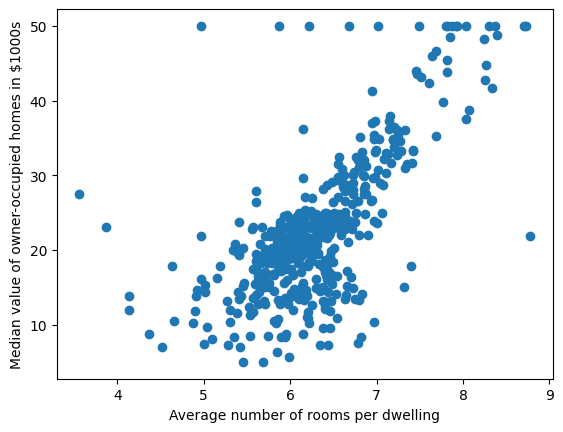

In [49]:
dataset = df.loc[:, ["RM", "MEDV"]].values
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

## Introduction to Linear Regression
From the data above, if a house has 7 rooms what would be the estimated price? For us, we can see that it should be somewhere around 30,000$. This is because we can clearly see the trend in the data. The main idea of regression problem is to look for trends in data and using them to predict any future inputs. Specifically, we will focuse on linear regression. 


The trend in the above dataset would look something like the following:

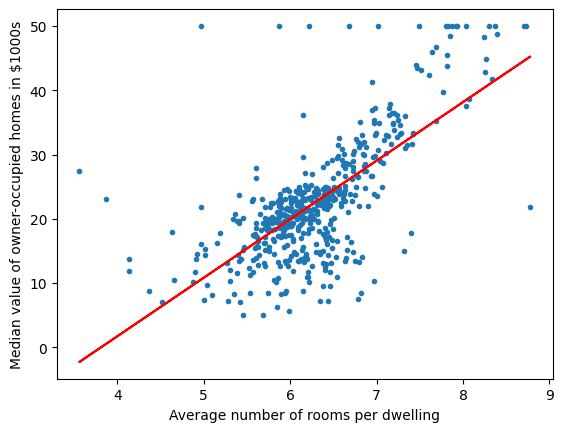

In [103]:
plt.scatter(dataset[:, 0], dataset[:, 1], marker='.')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')

line = np.polyfit(dataset[:, 0], dataset[:, 1], 1) # create a line using numpy's built-in poly fit function
plt.plot(dataset[:, 0], line[0] * dataset[:, 0] + line[1], color='red') # the estimated line that we would like to fit

plt.show()

The red line above was created using numpy's built-in poly-fit function. But we will try to implement our own algorithm to find linear trends in the same dataset.

# Naive implementation

In [169]:
def model(input, m, b):
    return m * input + b

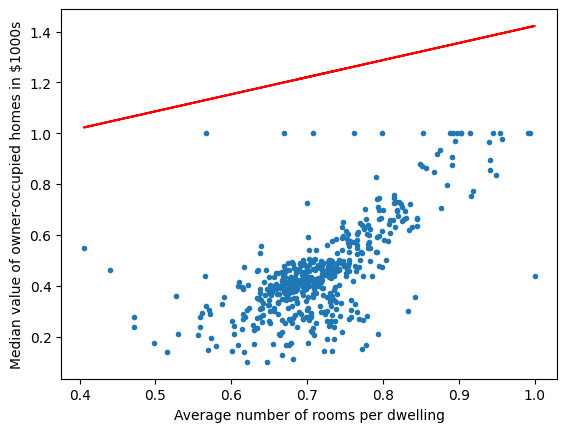

In [170]:
X = dataset[:, 0] / max(dataset[:, 0]) # normalize the input values (0 -> 1)
TARGET = dataset[:, 1] / max(dataset[:, 1]) # normalize the target values (0 -> 1)

m = random.random()
b = random.random()
predictions = model(X, m, b)

plt.scatter(X, TARGET, marker='.')
plt.plot(X, predictions, color='red')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()


As you can see, m and b is set to random. And so the predictions that it makes are not even close. To determine how bad the model has performed, we use the following formula:

$$
\frac{1}{2} \sum_{i=0}^{n} ( \; \text{predictions}_{i} - \text{targets}_{i} \; ) ^ 2
$$

where n is the total size of the dataset

This basically means that we go through every predictions, find its difference from the real target, raise it to the power of 2, and add all the results up. Dividing the whole thing by 2 is to help simplify future steps.

In [171]:
def loss(predictions, targets):
    return ((predictions - targets) ** 2).sum() / 2

print("Error:", loss(predictions, TARGET) / len(TARGET))

Error: 0.3161281462107011


This is what it looks like visually.

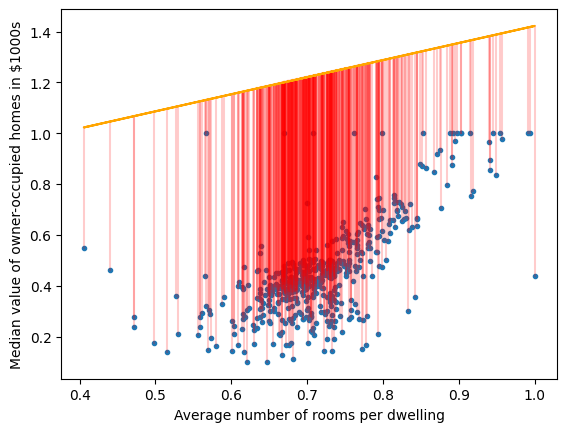

In [172]:
def drawLine():
    for i in range(len(predictions)):
        plt.plot([X[i], X[i]], [predictions[i], TARGET[i]], color='red', alpha=0.2)
    plt.scatter(X, TARGET, marker='.')
    plt.plot(X, predictions, color='orange')
    plt.xlabel('Average number of rooms per dwelling')
    plt.ylabel('Median value of owner-occupied homes in $1000s')
    plt.show()

drawLine()

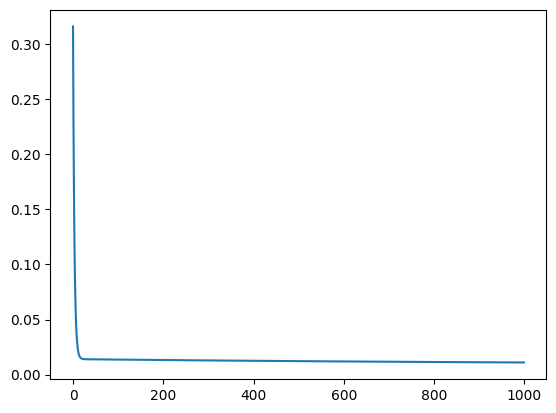

In [173]:
def fit():
    global m, b, X, TARGET
    predictions = model(X, m, b)

    dl_dm = (predictions - TARGET) * X 
    dl_db = (predictions - TARGET) 

    m = m - 0.1 * dl_dm.sum() / len(dl_dm)
    b = b - 0.1 * dl_db.sum() / len(dl_db)

    return loss(predictions, TARGET) / len(TARGET)

losses = [fit() for i in range(1000)]

plt.plot(losses)

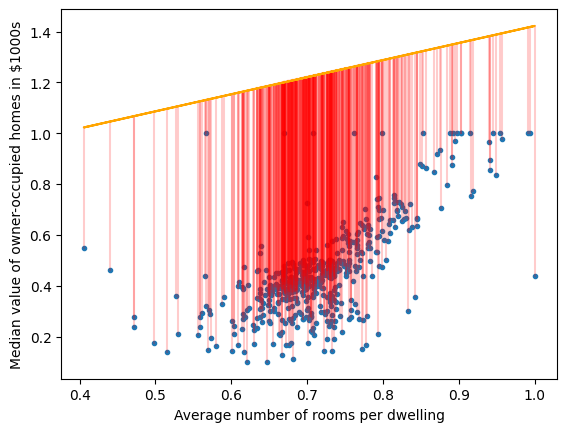

In [174]:
drawLine()

$$
\text{loss}(\text{model}(X, m, b), \text{target})
$$

One of the most common learning algorithm is to change m and b inorder to reduce the total loss value.

$$
m \leftarrow m - \eta \cdot(\text{some value})
$$

(new m = old m - learning rate * some value)

$$
b \leftarrow b - \eta \cdot (\text{some other value})
$$

(new b = old b - learning rate * some other value)

But how can I find the "some value"? 

Well, for any specific input, changing m would directly affect the loss value. If we know which direction of change in m that would increase the loss value, we can subtract it off the old m value. 

Using derivative to determine the rate of change of the error based on each of the parameters

$$
\frac{\partial}{\partial m} \text{loss}(\text{model}(X, m, b), \text{target})
$$

In [115]:
# loss(model(X, m, b), TARGET)

